In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'datasets.csv'
data = pd.read_csv(file_path)

data.head()

,Customer_ID,Product_ID,Transaction_ID,Purchase_Frequency,Average_Order_Value,Most_Frequent_Category,Time_Between_Purchases,Region,Churn_Probability,Lifetime_Value,Launch_Date,Peak_Sales_Date,Season,Preferred_Purchase_Times,Retention_Strategy
0,CUST_9HOS83,PROD_IK97D1,TRANS_II1DZG,17,172.57,Electronics,45,South America,0.98,2993.56,2020-03-14,2023-09-11,Winter,Afternoon,Loyalty Program
1,CUST_AJU17N,PROD_UNN7KP,TRANS_9HJF7I,10,64.89,Clothing,6,South America,0.66,983.18,2022-10-15,2023-01-02,Spring,Afternoon,Discount
2,CUST_11XNYF,PROD_0XEW2W,TRANS_OT96OM,3,120.38,Sports,23,Asia,0.60,601.90,2021-11-30,2023-04-06,Winter,Evening,Loyalty Program
3,CUST_IGH8G3,PROD_3IIAJN,TRANS_45V00G,12,70.34,Clothing,5,North America,0.78,1082.15,2022-03-20,2023-03-23,Spring,Evening,Discount
4,CUST_OK6PUM,PROD_VMIWD2,TRANS_ZAK760,18,42.39,Electronics,10,North America,0.52,1467.35,2022-11-09,2023-10-28,Spring,Morning,Discount


In [2]:
# Memilih fitur yang kami anggap relevan untuk mencari segmentasi dari customer
features = ['Purchase_Frequency', 'Average_Order_Value', 'Churn_Probability', 'Time_Between_Purchases', 'Lifetime_Value']

# Mengisi nilai kosong dengan nilai rata-rata pada setiap kolom/fitur yang dipilih
for feature in features:
    data[feature] = data[feature].fillna(data[feature].mean())

In [3]:
# Melakukan handling Outlier menggunakan metode IQR
for feature in features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[feature] = data[feature].clip(lower_bound, upper_bound)

In [4]:
# Melakukan standarisasi data
scaler = StandardScaler()
segmented_data = scaler.fit_transform(data[features])

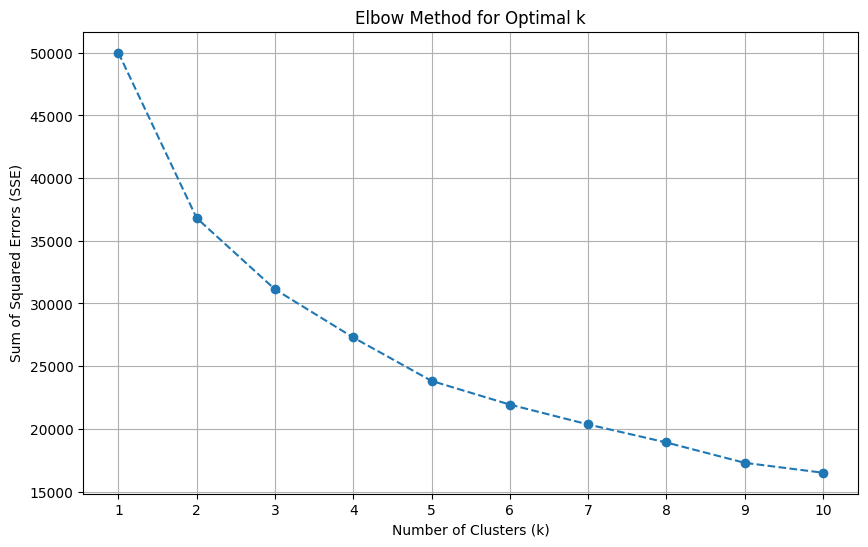

In [5]:
# Mencari nilai K yang optimal untuk K-Means menggunakan elbow method
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(segmented_data)
    sse.append(kmeans.inertia_)

# Memvisualisasikan data
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [6]:
#Mengambil nilai K = 4, berdasarkan grafik elbow method
kmeans = KMeans(n_clusters=4, random_state=42)
data['Segment'] = kmeans.fit_predict(segmented_data)

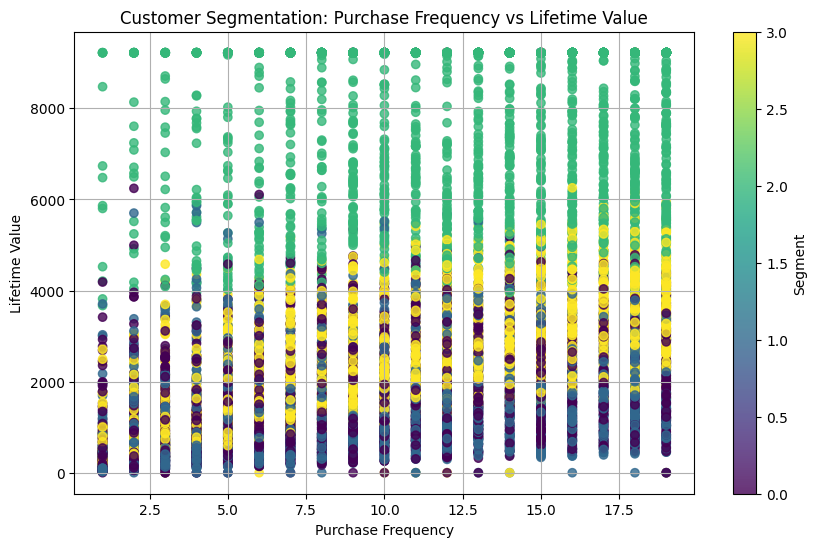

In [7]:
# Melakukan visualisasi data menggunakan Scatter plot untuk Lifetime Value dan Purchase Frequency
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Purchase_Frequency'], data['Lifetime_Value'], c=data['Segment'], cmap='viridis', alpha=0.8)
plt.title('Customer Segmentation: Purchase Frequency vs Lifetime Value')
plt.xlabel('Purchase Frequency')
plt.ylabel('Lifetime Value')
plt.colorbar(scatter, label='Segment')
plt.grid(True)
plt.show()

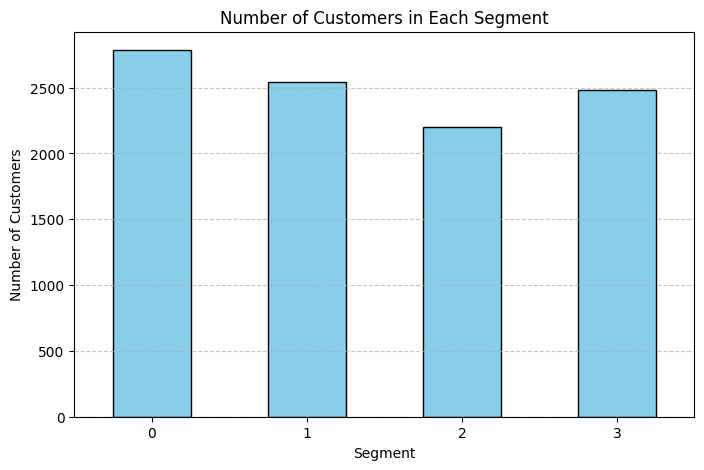

In [8]:
# Melakukan visualisasi data untuk setiap segment dari customer menggunakan Bar Chart
plt.figure(figsize=(8, 5))
data['Segment'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Customers in Each Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()